In [102]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Mock Off-Center Disk

<ipython-input-128-cfd0f75645f6>:43: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Greys_r"))
  cmap.set_bad('k')


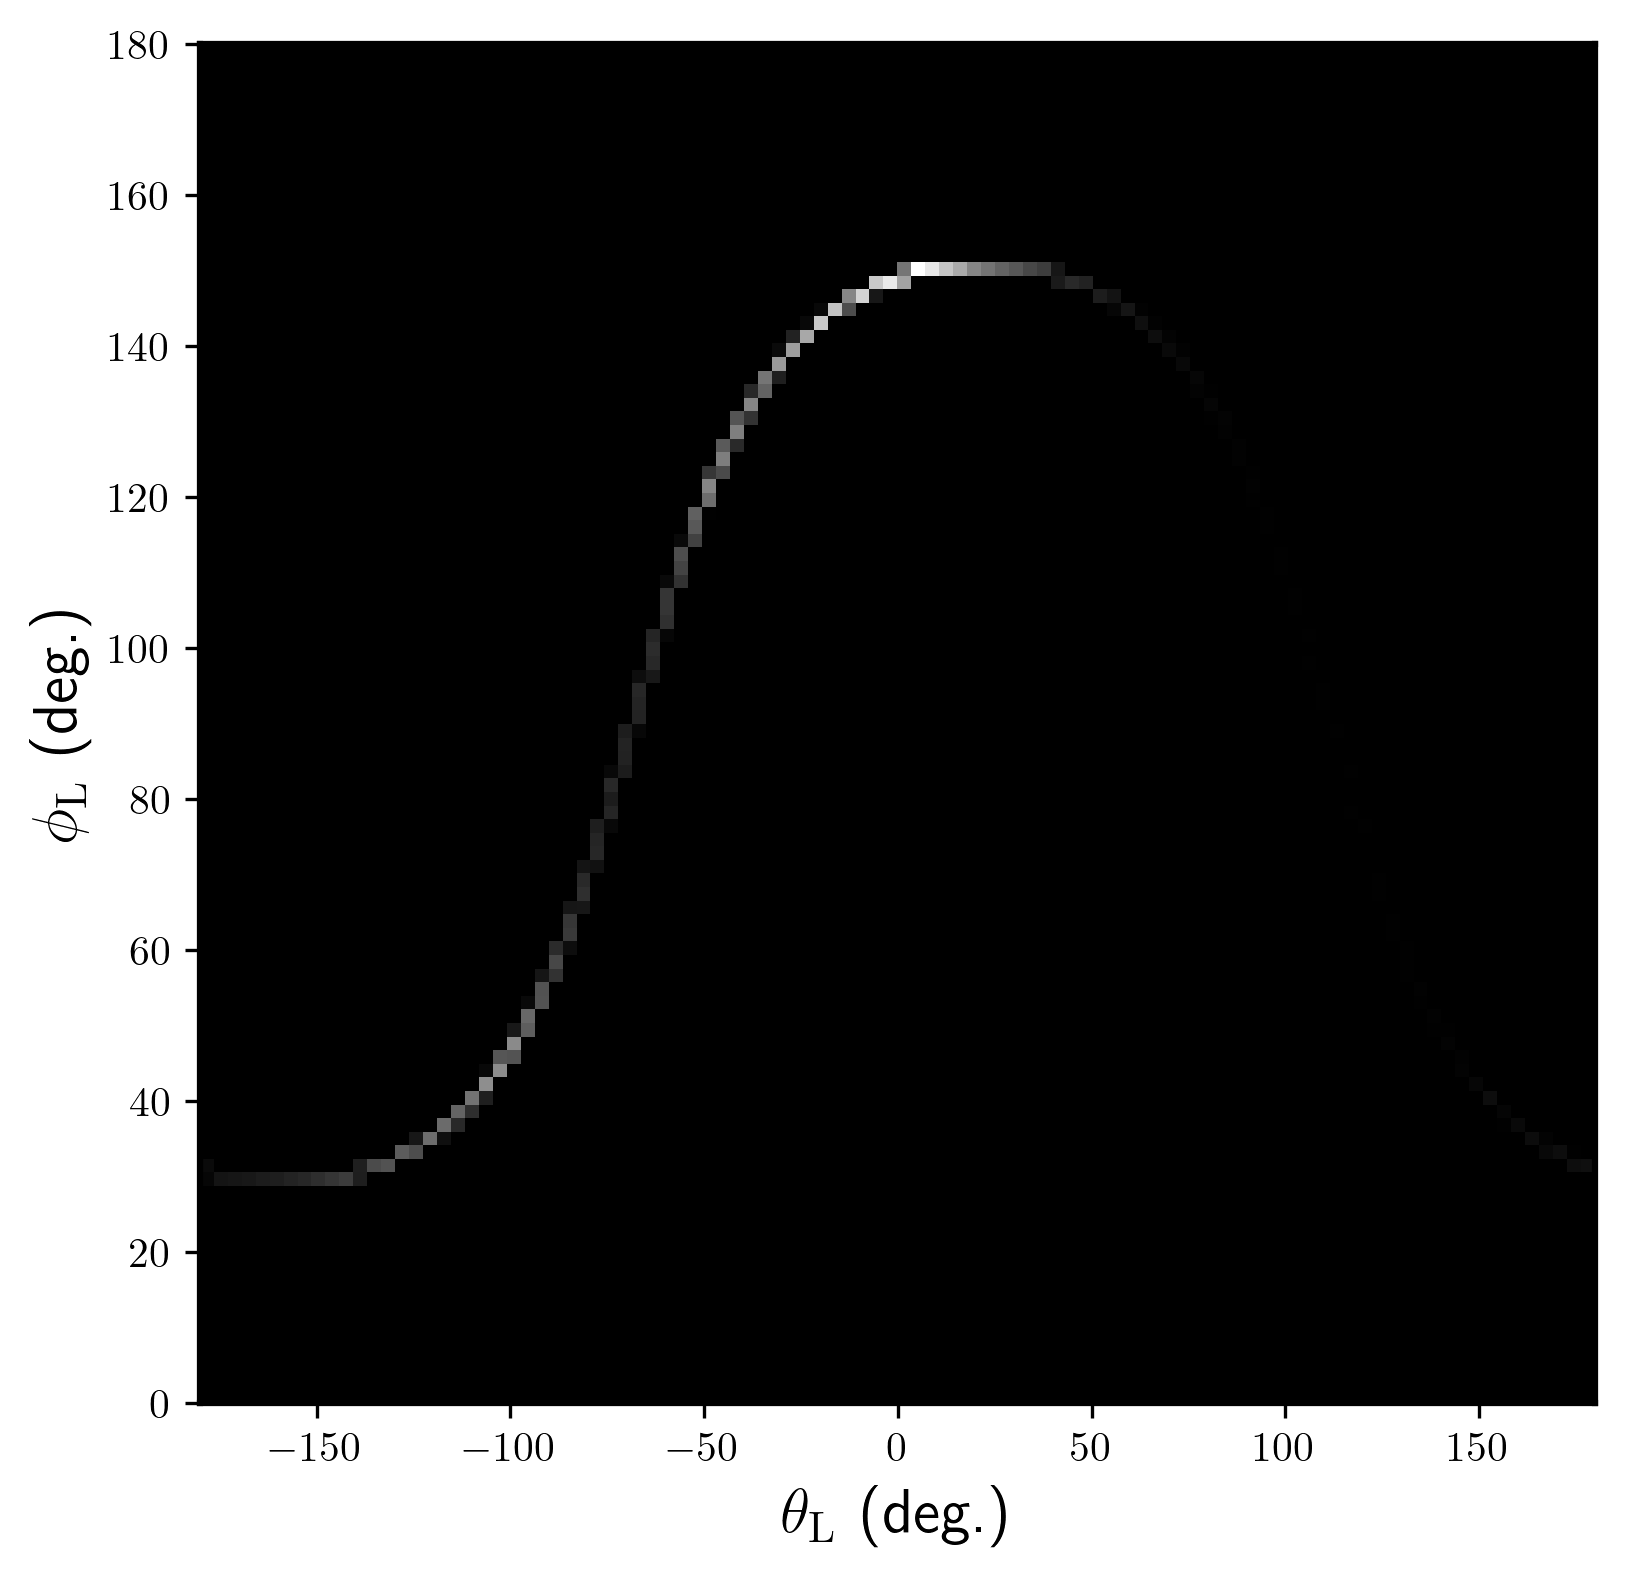

In [128]:
v_bulk = np.array([100, 60, 30])
r_bulk = np.array([50., 20., 30.])



vrot = np.sqrt(np.sum(v_bulk**2.))*0.70
disk_size = 10.
xx = np.linspace(-disk_size, disk_size, 100)
yy = np.linspace(-disk_size, disk_size, 100)

XX, YY = np.meshgrid(xx, yy)


r     = np.sqrt(XX**2. + YY**2.)
theta = np.arctan2(XX, YY)
vx = vrot * np.cos(theta) + v_bulk[0]
vy = vrot * np.sin(theta) + v_bulk[1]
vz = np.zeros(shape(vy))  + v_bulk[2]

Lx, Ly, Lz = vx * np.nan, vy * np.nan, vz * np.nan

for ii in np.arange(len(vx.ravel())):
    vx_i = vx.ravel()[ii]
    vy_i = vy.ravel()[ii]
    vz_i = vz.ravel()[ii]
    v_i = np.array([vx_i, vy_i, vz_i])
    L =  np.cross(v_i, r_bulk)
    Lx.ravel()[ii] = L[0]
    Ly.ravel()[ii] = L[1]
    Lz.ravel()[ii] = L[2]
    
Ltot = np.sqrt(Lx**2. + Ly**2. + Lz**2.)

phil = np.arccos(Lz /Ltot)*180./pi
thel = np.arctan2(Ly, Lx)*180./pi


fig, ax = plt.subplots(1,1, figsize = (6,6))
xmn, xmx = -180, 180
ymn, ymx = 0, 180
nbins = 100
cmap = mpl.cm.Greys_r
cmap.set_bad('k')
Ltot[Ltot == 0] = np.nan
ax.hist2d(thel.ravel(), phil.ravel(), nbins, 
          [[xmn, xmx], [ymn, ymx]], 
          weights = Ltot.ravel(),
          cmap = cmap)

xlbl = r'$\theta_{\mathrm{L}}$ (deg.)'
ylbl = r'$\phi_{\mathrm{L}}$ (deg.)'
ax.set_xlabel(xlbl, fontsize = 15)
ax.set_ylabel(ylbl, fontsize = 15)

fig.set_dpi(300)


In [108]:
ymx

180

In [98]:
phil.max()

117.50054797386949